# Análisis de la descripción de productos audiovisuales en la plataforma de Netflix (Pt. 1)


**Nombre:** Leobardo García Reyes

**Matrícula:** 1616825

## Carga de librerías

In [1]:
import numpy as np
import pandas as pd
import os
from os import path
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from collections import Counter
import random
from wordcloud import WordCloud, STOPWORDS

In [2]:
import re, string, unicodedata
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [3]:
nltk.download('punkt') # Descargar tokenizar
nltk.download('stopwords') # Descargar stopwords
nltk.download('wordnet') # Descargar lematización


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Carga de archivo

In [4]:
# Carga de archivo
netflix = pd.read_csv('D:/Documentos/Maestría en Ciencia de Datos/Matria PyCD/Base de datos/netflix_titles.csv')
netflix.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


## Seleccionar la columna de descripción

In [5]:
# Columna de descripción de la película
desc = netflix['description']
desc

0       As her father nears the end of his life, filmm...
1       After crossing paths at a party, a Cape Town t...
2       To protect his family from a powerful drug lor...
3       Feuds, flirtations and toilet talk go down amo...
4       In a city of coaching centers known to train I...
                              ...                        
8802    A political cartoonist, a crime reporter and a...
8803    While living alone in a spooky town, a young g...
8804    Looking to survive in a world taken over by zo...
8805    Dragged from civilian life, a former superhero...
8806    A scrappy but poor boy worms his way into a ty...
Name: description, Length: 8807, dtype: object

## Primera parte de limpieza de texto
## Convertir texto en minúsculas

In [6]:
# Texto en minúsculas
minuscula = [cadena.lower() for cadena in desc]
minuscula[:3]

['as her father nears the end of his life, filmmaker kirsten johnson stages his death in inventive and comical ways to help them both face the inevitable.',
 'after crossing paths at a party, a cape town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth.',
 'to protect his family from a powerful drug lord, skilled thief mehdi and his expert team of robbers are pulled into a violent and deadly turf war.']

## Eliminar números en el texto

In [7]:
# Eliminar números
numeros = [re.sub(r'[0-9]+', '', cadena) for cadena in minuscula]
numeros[:3]

['as her father nears the end of his life, filmmaker kirsten johnson stages his death in inventive and comical ways to help them both face the inevitable.',
 'after crossing paths at a party, a cape town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth.',
 'to protect his family from a powerful drug lord, skilled thief mehdi and his expert team of robbers are pulled into a violent and deadly turf war.']

## Eliminar texto dentro de los paréntesis

In [8]:
# Eliminar texto dentro del paréntesis
parentesis = [re.sub("([\(\[]).*?([\)\]])", "\g<1>\g<2>", cadena) for cadena in numeros]
parentesis[:3]

['as her father nears the end of his life, filmmaker kirsten johnson stages his death in inventive and comical ways to help them both face the inevitable.',
 'after crossing paths at a party, a cape town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth.',
 'to protect his family from a powerful drug lord, skilled thief mehdi and his expert team of robbers are pulled into a violent and deadly turf war.']

## Eliminar signos

In [9]:
# Eliminar signos de puntuación
signos = [re.sub(r'[^\w\s]', '', cadena) for cadena in parentesis]
signos[:3]

['as her father nears the end of his life filmmaker kirsten johnson stages his death in inventive and comical ways to help them both face the inevitable',
 'after crossing paths at a party a cape town teen sets out to prove whether a privateschool swimming star is her sister who was abducted at birth',
 'to protect his family from a powerful drug lord skilled thief mehdi and his expert team of robbers are pulled into a violent and deadly turf war']

## Eliminar espacios en blanco

In [10]:
# Eliminar espacios en blanco
espacios_blancos = [cadena.strip() for cadena in signos]
espacios_blancos[:3]

['as her father nears the end of his life filmmaker kirsten johnson stages his death in inventive and comical ways to help them both face the inevitable',
 'after crossing paths at a party a cape town teen sets out to prove whether a privateschool swimming star is her sister who was abducted at birth',
 'to protect his family from a powerful drug lord skilled thief mehdi and his expert team of robbers are pulled into a violent and deadly turf war']

## Segunda parte de la limpieza de texto
## Tokenización de las palabras

In [11]:
# Palabras tokenizadas, primer método
tokenizar1 = [cadena.split() for cadena in espacios_blancos]
tokenizar1[0][:5]

['as', 'her', 'father', 'nears', 'the']

In [12]:
# Palabras tokenizadas, segundo método (Se tarda más)
tokenizar2 = [word_tokenize(cadena) for cadena in espacios_blancos]
tokenizar2[0][:5]

['as', 'her', 'father', 'nears', 'the']

## Juntar todas las palabras en una lista

In [13]:
# Juntar todas las palabras en una sola lista
descripcion = []
for cadena in tokenizar2:
    for i in cadena:
        descripcion.append(i)
descripcion[:9]

['as', 'her', 'father', 'nears', 'the', 'end', 'of', 'his', 'life']

## Seleccionar o añadir stopwords

In [65]:
# Stopwords en ingles
sw = stopwords.words("english")

# Nuevas stopwords
nuevas_sw = ('one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten')

for i in nuevas_sw:
    sw.append(i)

print(sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

## Eliminar stopwords de la lista que se creo

In [66]:
# Eliminar stopwords
sin_sw = [cadena for cadena in descripcion if not cadena in sw]
sin_sw[:8]

['father', 'nears', 'end', 'life', 'filmmaker', 'kirsten', 'johnson', 'stages']

## Seleccionar método de stem y transformar las palabras a su raíz

In [67]:
# Método Stemming
metodo_stemming = PorterStemmer()

palabra_raiz1 = []
for cadena in sin_sw:
    # print('Actual:', cadena, ' -  Stem:', metodo_stemming.stem(cadena))
    palabra_raiz1.append(metodo_stemming.stem(cadena))
    
palabra_raiz1[:8]

['father', 'near', 'end', 'life', 'filmmak', 'kirsten', 'johnson', 'stage']

In [78]:
# Método Lematizar
# https://www.geeksforgeeks.org/python-lemmatization-approaches-with-examples/
metodo_lematizador = WordNetLemmatizer()

palabra_raiz2 = []
for cadena in sin_sw:
    # print('Actual:', cadena, ' -  Lem:', metodo_lematizador.lemmatize(cadena, pos ='v'))
    palabra_raiz2.append(metodo_lematizador.lemmatize(cadena, pos = 'v'))
    
palabra_raiz2[:8]

['father', 'near', 'end', 'life', 'filmmaker', 'kirsten', 'johnson', 'stag']

## Gráfica de la frecuencia de palabras

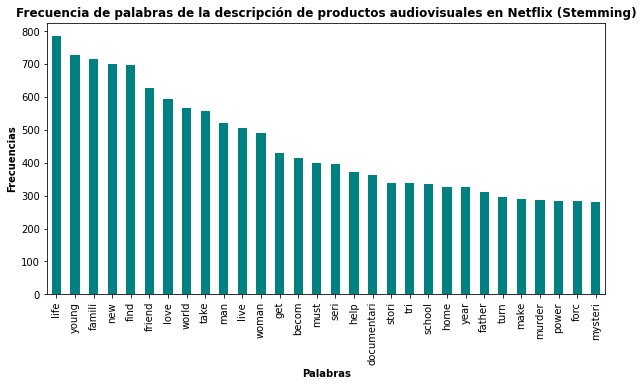

In [79]:
# Palabras raras:
# series - seri
# family - famili
# friends - friend
# become - becom
# documentary - documentari
# story - stori
# try - tri

# Palabras que no aparecen:
# stori
# year
# force
# go
# follow

def gra_pa(datos, titulo = None):
    aux = pd.Series(datos)
    aux.value_counts()[:30].plot.bar(figsize = (10, 5), color = 'teal')
    if titulo: 
        plt.title(titulo, fontweight = 'bold')
    plt.xlabel('Palabras', fontweight = 'bold')
    plt.ylabel('Frecuencias', fontweight = 'bold')

gra_pa(palabra_raiz1, titulo = 'Frecuencia de palabras de la descripción de productos audiovisuales en Netflix (Stemming)')

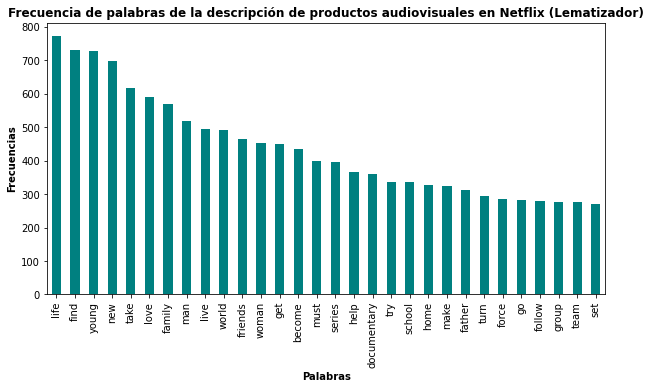

In [80]:
gra_pa(palabra_raiz2, titulo = 'Frecuencia de palabras de la descripción de productos audiovisuales en Netflix (Lematizador)')

## Nube de palabras

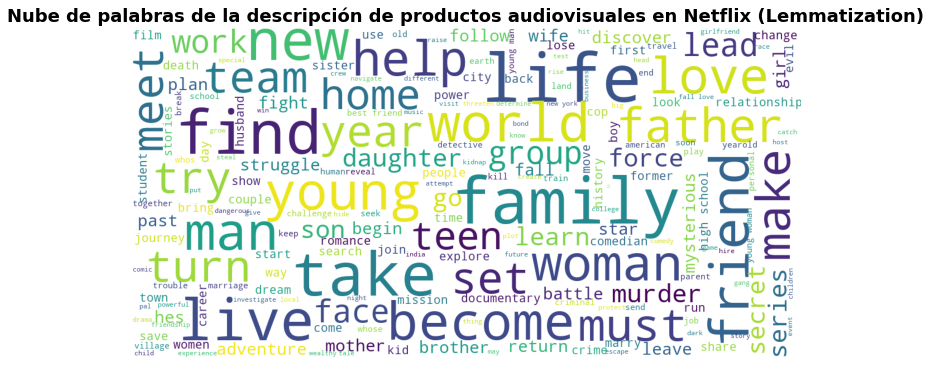

In [85]:
# Generar nube de palabras
metodo = palabra_raiz2
unir = ''
for cadena in metodo:
    aux = cadena.lower().split()
    unir += " ".join(aux)+" "

def mostrar_nube(unir, titulo = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 1
    ).generate(unir)
    fig = plt.figure(1, figsize = (12, 12))
    plt.axis('off')
    if titulo: 
        plt.title(titulo, fontweight = 'bold', fontsize = 18)
    plt.imshow(wordcloud)
    plt.show()

mostrar_nube(unir, titulo = 'Nube de palabras de la descripción de productos audiovisuales en Netflix (Lemmatization)')

## Nube de palabras con el logo de Netflix

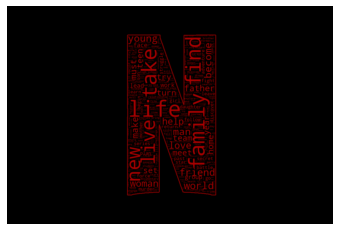

In [136]:
# Generar nube de palabras con el logo de Netflix
# Este código lo obtuve del siguiente link
# https://amueller.github.io/word_cloud/auto_examples/a_new_hope.html

def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 100%, 33%)"

logonet = np.array(Image.open(path.join('D:/Descargas/', 'logonet.png')))

wc = WordCloud(background_color = 'black', max_words = 2000, mask = logonet,
               contour_width = 3, contour_color = 'darkred')
wc.generate(unir)

plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),
           interpolation="bilinear")
plt.axis('off')
plt.figure(1, figsize = (30, 30))
#plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
#plt.axis('off')
plt.show()

## Pruebas personales

In [45]:
raro = []
for cadena in sin_sw:
    if(cadena[:2] == 'li'):
        # print(cadena)
        raro.append(cadena)

Counter(raro)

Counter({'life': 774,
         'living': 98,
         'little': 81,
         'lines': 10,
         'lives': 277,
         'lisa': 2,
         'lining': 1,
         'live': 114,
         'like': 57,
         'limb': 1,
         'lifealtering': 4,
         'lifestyle': 21,
         'liveaction': 8,
         'lifechanging': 17,
         'lie': 9,
         'lincoln': 3,
         'lifetime': 11,
         'lived': 7,
         'list': 9,
         'likely': 2,
         'liz': 5,
         'lies': 28,
         'linked': 16,
         'light': 38,
         'lively': 8,
         'lifeordeath': 3,
         'linking': 2,
         'liberates': 1,
         'line': 26,
         'li': 4,
         'ling': 1,
         'lightning': 2,
         'livestream': 1,
         'link': 11,
         'lifestyles': 5,
         'limits': 8,
         'lifes': 12,
         'likes': 4,
         'lifelong': 16,
         'lifeanddeath': 1,
         'lina': 1,
         'lift': 3,
         'lighthearted': 6,
         'lifers':

In [49]:
metodo_stemming = PorterStemmer()

prueba = []
for cadena in raro:
    # print('Actual:', cadena, ' -  Stem:', metodo_stemming.stem(cadena))
    prueba.append(metodo_lematizador.lemmatize(cadena, pos ='n'))
    
Counter(prueba)

Counter({'life': 1063,
         'living': 98,
         'little': 81,
         'line': 36,
         'lisa': 2,
         'lining': 1,
         'live': 114,
         'like': 61,
         'limb': 1,
         'lifealtering': 4,
         'lifestyle': 26,
         'liveaction': 8,
         'lifechanging': 17,
         'lie': 37,
         'lincoln': 3,
         'lifetime': 12,
         'lived': 7,
         'list': 9,
         'likely': 2,
         'liz': 5,
         'linked': 16,
         'light': 46,
         'lively': 8,
         'lifeordeath': 3,
         'linking': 2,
         'liberates': 1,
         'li': 5,
         'ling': 1,
         'lightning': 2,
         'livestream': 1,
         'link': 16,
         'limit': 10,
         'lifelong': 16,
         'lifeanddeath': 1,
         'lina': 1,
         'lift': 6,
         'lighthearted': 6,
         'lifer': 1,
         'limbo': 3,
         'liam': 3,
         'librarian': 3,
         'lily': 4,
         'listener': 1,
         'lisbon': 1

In [43]:
metodo_lematizador.lemmatize('dogs', pos = 'v')

'dog'

In [59]:
metodo_stemming.stem('family')

'famili'